[1.6139093870336907, 5.578080336668626, 1.6497825002177602, 1.9029567445411135, 1.4821690087634165, 3.921087867020452, 0.4960739977450078, 1.350023602667641, 1.2775713560427877, 24.741273247034655, 0.4456934751919432, 1.4543402511089067, 0.7792206099747159, 1.939302365008645, 61.587802425316816, 2.2739627567948495, 1.5318205392052782, 3.6826077123898013, 0.5755484689977244, 5.354279178631607, 4.556346636343676e-13, 1.0992452913273174, 2.0008435821699333, 27.048606940357942, 4.3748118319278975, 5.401320549827535, 0.9472206891312925, 54.14149889247781, 8.362103027340932, 2.920289155194081, 1.9923389358168464, 1.3372168047484783, 6.296655088273071, 56.609989469103766, 10.372833190158707, 1.7292887322268138, 58.40960591098044, 5.183193197376946, 40.52239366318181, 0.7298673328986871, 68.05828386403881, 0.6090458849050754, 3.8199666631103044, 1.5220270496153367, 8.601970165740088e-13, 1.2624041608930021, 1.2453739533430934, 47.36974555531608, 4.410547895142866, 1.1359947477133945, 8.4084670

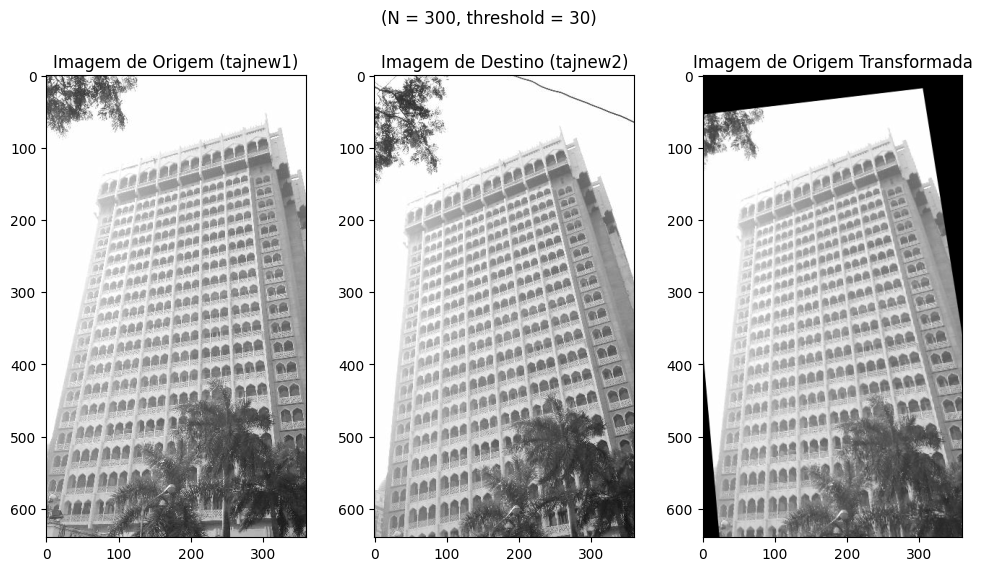

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from RANSAC import RANSAC


goi1 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/tajnew1.jpg',cv2.IMREAD_GRAYSCALE)
goi2 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista03/CV_Lista03_dados/tajnew2.jpg',cv2.IMREAD_GRAYSCALE)


orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(goi1,None)
kp2, des2 = orb.detectAndCompute(goi2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

N = 300
t = 30

H, errors = RANSAC(N, t, matches, kp1, kp2)
print(errors)

# Apply homography
result_img = cv2.warpPerspective(goi1, H, (goi2.shape[1], goi2.shape[0]))


plt.figure(figsize=(12, 6))
plt.suptitle(f'(N = {N}, threshold = {t})',y=0.99)

plt.subplot(1, 3, 1)
plt.imshow(goi1, cmap='gray')
plt.title('Imagem de Origem (tajnew1)')

plt.subplot(1, 3, 2)
plt.imshow(goi2, cmap='gray')
plt.title('Imagem de Destino (tajnew2)')

plt.subplot(1, 3, 3)
plt.imshow(result_img, cmap='gray')
plt.title('Imagem de Origem Transformada')
plt.show()